# Ipl Data Analysis 2008-2020

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import numpy as np
import matplotlib
sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
from bs4 import BeautifulSoup
print('Imported!')


Imported!


In [4]:
ipl_data=pd.read_csv('IPL.csv')

In [5]:
ipl_data

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [6]:
ipl_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [7]:
ipl_data.tail()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [8]:
ipl_data.shape

(816, 17)

In [9]:
ipl_data.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [10]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [11]:
ipl_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [12]:
for col in ipl_data:
    print(ipl_data[col].unique())


[ 335982  335983  335984  335985  335986  335987  335988  335989  335990
  335991  335992  335993  335994  335995  335996  335997  335998  335999
  336000  336001  336002  336003  336004  336005  336006  336007  336008
  336009  336010  336011  336012  336013  336014  336015  336016  336017
  336018  336019  336020  336021  336022  336023  336024  336025  336026
  336027  336028  336029  336031  336032  336033  336034  336035  336036
  336037  336038  336039  336040  392181  392182  392183  392184  392185
  392186  392188  392189  392190  392191  392192  392194  392195  392196
  392197  392198  392199  392200  392201  392202  392203  392204  392205
  392206  392207  392208  392209  392210  392211  392212  392213  392214
  392215  392216  392217  392218  392219  392220  392221  392222  392223
  392224  392225  392226  392227  392228  392229  392230  392231  392232
  392233  392234  392235  392236  392237  392238  392239  419106  419107
  419108  419109  419110  419111  419112  419113  4

In [13]:
ipl_data.method.first_valid_index()

40

In [14]:
ipl_data.loc[10:40]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
10,335992,Bangalore,2008-04-26,SR Watson,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,7.0,N,NaN,MR Benson,IL Howell
11,335993,Chennai,2008-04-26,JDP Oram,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,bat,Chennai Super Kings,wickets,9.0,N,NaN,BF Bowden,AV Jayaprakash
12,335994,Mumbai,2008-04-27,AC Gilchrist,Dr DY Patil Sports Academy,0,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,Deccan Chargers,wickets,10.0,N,NaN,Asad Rauf,SL Shastri
13,335995,Chandigarh,2008-04-27,SM Katich,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,bat,Kings XI Punjab,wickets,4.0,N,NaN,RE Koertzen,I Shivram
14,335996,Bangalore,2008-04-28,MS Dhoni,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13.0,N,NaN,BR Doctrove,RB Tiffin
15,335997,Kolkata,2008-04-29,ST Jayasuriya,Eden Gardens,0,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,Mumbai Indians,wickets,7.0,N,NaN,BF Bowden,AV Jayaprakash
16,335998,Delhi,2008-04-30,GD McGrath,Feroz Shah Kotla,0,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Delhi Daredevils,runs,10.0,N,NaN,Aleem Dar,I Shivram
17,335999,Hyderabad,2008-05-01,SE Marsh,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,N,NaN,BR Doctrove,RB Tiffin
18,336000,Jaipur,2008-05-01,SA Asnodkar,Sawai Mansingh Stadium,0,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,Rajasthan Royals,runs,45.0,N,NaN,RE Koertzen,GA Pratapkumar
19,336001,Chennai,2008-05-02,V Sehwag,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,Delhi Daredevils,wickets,8.0,N,NaN,BF Bowden,K Hariharan


In [15]:
ipl_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [16]:
ipl_data=ipl_data.drop(columns=['method'],axis=1)

In [17]:
ipl_data.shape

(816, 16)

## The team with the most number of wins per season.

In [18]:
ipl_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'umpire1', 'umpire2'],
      dtype='object')

In [19]:
ipl_data_city = ipl_data.groupby('date')['winner'].value_counts()
ipl_data_city

date        winner                     
2008-04-18  Kolkata Knight Riders          1
2008-04-19  Chennai Super Kings            1
            Delhi Daredevils               1
2008-04-20  Kolkata Knight Riders          1
            Royal Challengers Bangalore    1
                                          ..
2020-11-03  Sunrisers Hyderabad            1
2020-11-05  Mumbai Indians                 1
2020-11-06  Sunrisers Hyderabad            1
2020-11-08  Delhi Capitals                 1
2020-11-10  Mumbai Indians                 1
Name: winner, Length: 812, dtype: int64

In [20]:
ipl_data_winner=ipl_data.groupby('result')['winner'].value_counts()
ipl_data_winner

result   winner                     
runs     Mumbai Indians                 62
         Chennai Super Kings            53
         Kolkata Knight Riders          41
         Kings XI Punjab                40
         Royal Challengers Bangalore    38
         Sunrisers Hyderabad            34
         Rajasthan Royals               28
         Delhi Daredevils               25
         Deccan Chargers                18
         Delhi Capitals                  9
         Pune Warriors                   6
         Rising Pune Supergiant          5
         Kochi Tuskers Kerala            2
         Rising Pune Supergiants         2
         Gujarat Lions                   1
tie      Kings XI Punjab                 3
         Delhi Capitals                  2
         Mumbai Indians                  2
         Rajasthan Royals                2
         Royal Challengers Bangalore     2
         Kolkata Knight Riders           1
         Sunrisers Hyderabad             1
wickets  Kolkata 

## Venues

In [21]:
venue_ipl=ipl_data['venue'].value_counts()

In [22]:
venue_ipl.head()

Eden Gardens                                 77
Feroz Shah Kotla                             74
Wankhede Stadium                             73
M Chinnaswamy Stadium                        65
Rajiv Gandhi International Stadium, Uppal    64
Name: venue, dtype: int64

In [23]:
venue_df = pd.DataFrame(columns=['Venue', 'Matches'])
for items in venue_ipl.iteritems():
    temp_df = pd.DataFrame({
        'Venue':[items[0]],
        'Matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

In [24]:
venue_df

,Venue,Matches
0,Eden Gardens,77
1,Feroz Shah Kotla,74
2,Wankhede Stadium,73
3,M Chinnaswamy Stadium,65
4,"Rajiv Gandhi International Stadium, Uppal",64
5,"MA Chidambaram Stadium, Chepauk",57
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Dubai International Cricket Stadium,33
9,Sheikh Zayed Stadium,29


<AxesSubplot:title={'center':'IPL Venues'}, xlabel='Matches', ylabel='Venue'>

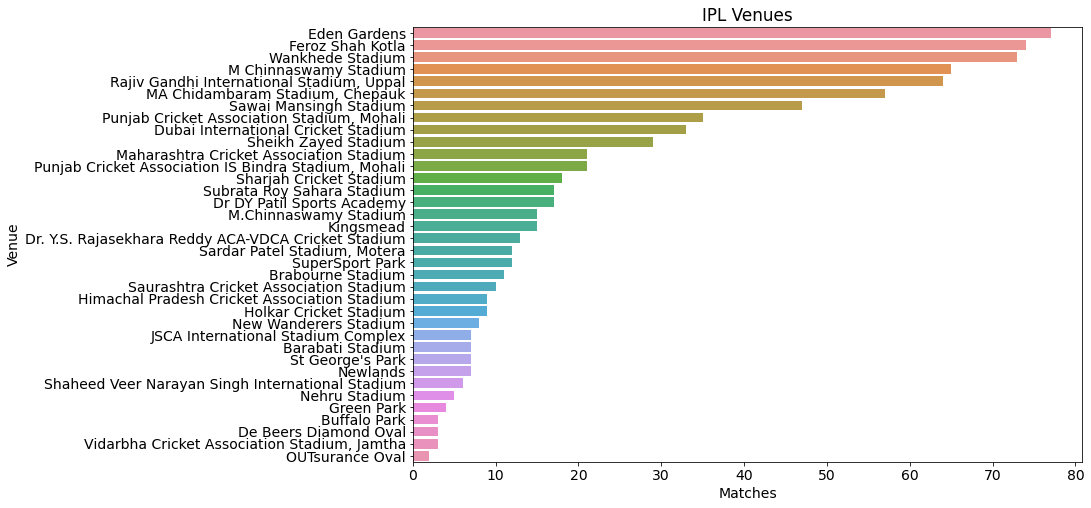

In [25]:
plt.title("IPL Venues")
sns.barplot(x='Matches',y='Venue',data=venue_df)

## The most successful IPL team

In [26]:
ipl_successful_team=ipl_data['winner'].value_counts()

In [27]:
ipl_successful_team

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [28]:
successful_team_df=pd.DataFrame(columns=['Teams','Wins'])

for items in ipl_successful_team.iteritems():
    temp_df1=pd.DataFrame({'Teams':[items[0]],'Wins':[items[1]]})
    successful_team_df=successful_team_df.append(temp_df1,ignore_index=True)

In [29]:
successful_team_df

,Teams,Wins
0,Mumbai Indians,120
1,Chennai Super Kings,106
2,Kolkata Knight Riders,99
3,Royal Challengers Bangalore,91
4,Kings XI Punjab,88
5,Rajasthan Royals,81
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,66
8,Deccan Chargers,29
9,Delhi Capitals,19


<AxesSubplot:title={'center':'IPl Most Successful Team'}, xlabel='Wins', ylabel='Teams'>

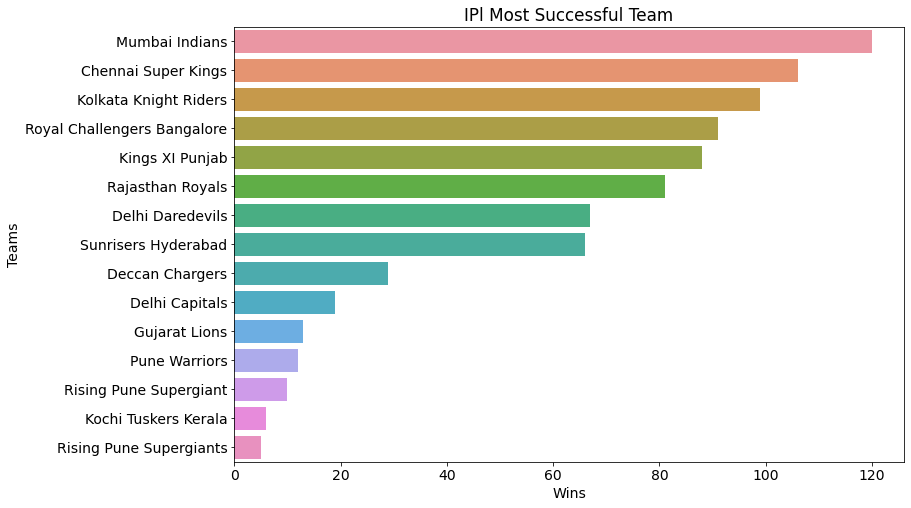

In [30]:
plt.title("IPl Most Successful Team")
sns.barplot(x="Wins",y="Teams",data=successful_team_df)

## Most Valuable Player


In [31]:
valuable_player=ipl_data['player_of_match'].value_counts()

In [32]:
valuable_player

AB de Villiers    23
CH Gayle          22
RG Sharma         18
MS Dhoni          17
DA Warner         17
                  ..
Kuldeep Yadav      1
JDP Oram           1
SO Hetmyer         1
PP Ojha            1
AC Voges           1
Name: player_of_match, Length: 233, dtype: int64

In [33]:
valuable_df=pd.DataFrame(columns=['Player','Wins'])
count=0
for items in valuable_player.iteritems():
    if count>=10:
        break
    else:
        temp_df2=pd.DataFrame({
        'Player':[items[0]],'Wins':[items[1]]
    })
    valuable_df=valuable_df.append(temp_df2,ignore_index=True)
    count=count+1

In [34]:
valuable_df

,Player,Wins
0,AB de Villiers,23
1,CH Gayle,22
2,RG Sharma,18
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,16
7,SK Raina,14
8,V Kohli,13
9,G Gambhir,13


<AxesSubplot:title={'center':'Most Valuable 10 Players'}, xlabel='Wins', ylabel='Player'>

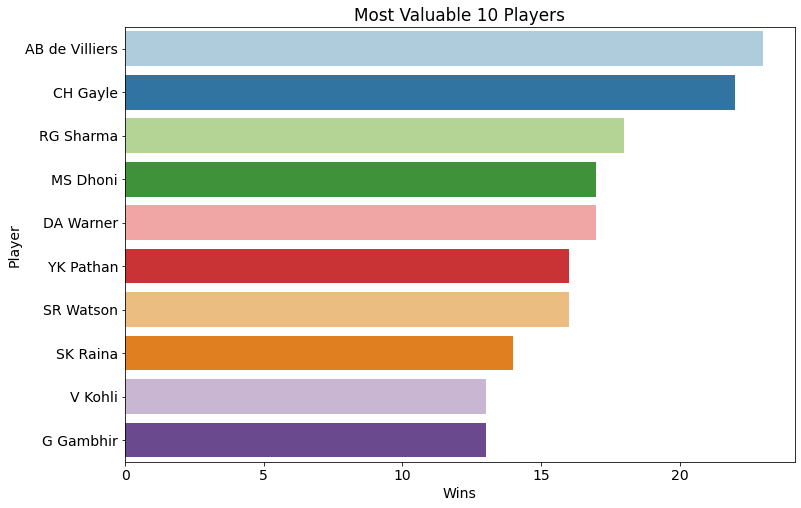

In [35]:
plt.title("Most Valuable 10 Players")
sns.barplot(x="Wins",y="Player",data=valuable_df,palette='Paired')

## The team that won the most number of toss


In [36]:
toss_wins=ipl_data['toss_winner'].value_counts()

In [37]:
toss_wins

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Delhi Capitals                  20
Pune Warriors                   20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

In [38]:
toss_df=pd.DataFrame(columns=['Team','Wins'])

for items in toss_wins.iteritems():
    temp_df3=pd.DataFrame({'Team':[items[0]],'Wins':[items[1]]})
    toss_df=toss_df.append(temp_df3,ignore_index=True)

In [39]:
toss_df

,Team,Wins
0,Mumbai Indians,106
1,Kolkata Knight Riders,98
2,Chennai Super Kings,97
3,Royal Challengers Bangalore,87
4,Rajasthan Royals,87
5,Kings XI Punjab,85
6,Delhi Daredevils,80
7,Sunrisers Hyderabad,57
8,Deccan Chargers,43
9,Delhi Capitals,20


<AxesSubplot:title={'center':'Most Toss Wins'}, xlabel='Wins', ylabel='Team'>

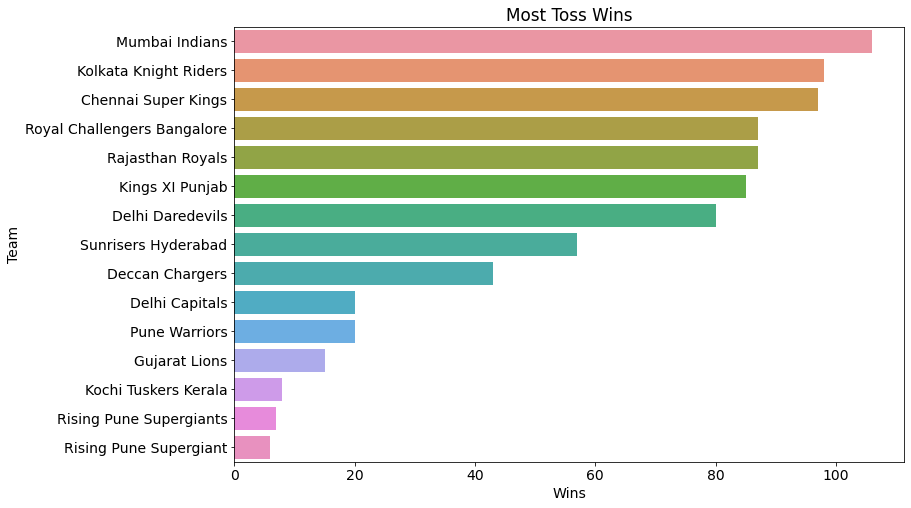

In [40]:
plt.title("Most Toss Wins")
sns.barplot(x="Wins",y="Team",data=toss_df)

## Toss Decisions

In [41]:
toss_decisions=ipl_data['toss_decision'].value_counts()

In [42]:
toss_decisions

field    496
bat      320
Name: toss_decision, dtype: int64

In [43]:
toss_decisions_df=pd.DataFrame(columns=['field','bat'])

for items in toss_decisions.iteritems():
    temp_df4=pd.DataFrame({'field':[items[0]],'bat':[items[1]]})
    toss_decisions_df=toss_decisions_df.append(temp_df4,ignore_index=True)

In [44]:
toss_decisions_df

,field,bat
0,field,496
1,bat,320


<AxesSubplot:title={'center':'Toss Decision'}, xlabel='bat', ylabel='field'>

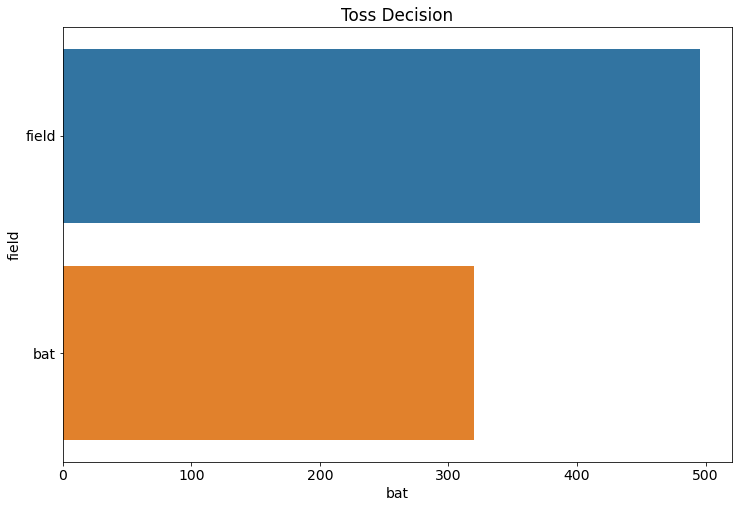

In [45]:
plt.title("Toss Decision")
sns.barplot(x="bat",y="field",data=toss_decisions_df)

## Which umpire has officiated the most number of IPL matches on-field?

In [46]:
umpire1_off=ipl_data['umpire1'].value_counts()
umpire1_off

HDPK Dharmasena          78
AK Chaudhary             56
Asad Rauf                51
M Erasmus                40
Aleem Dar                38
S Ravi                   37
BF Bowden                37
CB Gaffaney              34
BR Doctrove              34
KN Ananthapadmanabhan    33
AY Dandekar              28
C Shamshuddin            22
NJ Llong                 21
RE Koertzen              20
Nitin Menon              20
VA Kulkarni              19
S Asnani                 19
BNJ Oxenford             16
JD Cloete                16
YC Barde                 14
A Nand Kishore           14
BG Jerling               13
RK Illingworth           13
SS Hazare                11
K Hariharan              10
MR Benson                10
S Das                    10
DJ Harper                 9
CK Nandan                 8
UV Gandhe                 8
RM Deshpande              7
IL Howell                 7
GAV Baxter                7
SJ Davis                  6
VK Sharma                 6
RJ Tucker           

In [47]:
umpire2_off=ipl_data['umpire2'].value_counts()
umpire2_off

S Ravi             84
C Shamshuddin      60
SJA Taufel         54
CK Nandan          49
RJ Tucker          41
Nitin Menon        37
BNJ Oxenford       32
AK Chaudhary       31
VA Kulkarni        31
RB Tiffin          30
SK Tarapore        26
M Erasmus          25
AM Saheba          23
RE Koertzen        21
VK Sharma          20
PR Reiffel         19
RK Illingworth     18
DJ Harper          18
HDPK Dharmasena    16
NJ Llong           16
SL Shastri         13
K Srinath          13
CB Gaffaney        13
A Nand Kishore     11
S Asnani           11
K Hariharan        11
BR Doctrove         8
A Deshmukh          7
IL Howell           7
PG Pathak           7
SS Hazare           6
GA Pratapkumar      6
I Shivram           6
AL Hill             6
K Srinivasan        6
YC Barde            5
S Das               5
TH Wijewardene      5
BG Jerling          4
AV Jayaprakash      4
IJ Gould            3
SD Ranade           2
MR Benson           2
JD Cloete           1
Subroto Das         1
SD Fry    

In [48]:
umpires_df=pd.concat([umpire1_off,umpire2_off],axis=1)

In [49]:
umpires_df

,umpire1,umpire2
HDPK Dharmasena,78.0,16.0
AK Chaudhary,56.0,31.0
Asad Rauf,51.0,NaN
M Erasmus,40.0,25.0
Aleem Dar,38.0,NaN
S Ravi,37.0,84.0
BF Bowden,37.0,NaN
CB Gaffaney,34.0,13.0
BR Doctrove,34.0,8.0
KN Ananthapadmanabhan,33.0,NaN


In [50]:
umpire_ser = umpires_df.sum(axis=1)

umpire_df = pd.DataFrame(columns=["umpire", "matches"])

for items in umpire_ser.iteritems():
    temp_df5 = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpire_df= umpire_df.append(temp_df5, ignore_index=True) 
    

In [51]:
umpire_df

,umpire,matches
0,HDPK Dharmasena,94.0
1,AK Chaudhary,87.0
2,Asad Rauf,51.0
3,M Erasmus,65.0
4,Aleem Dar,38.0
5,S Ravi,121.0
6,BF Bowden,37.0
7,CB Gaffaney,47.0
8,BR Doctrove,42.0
9,KN Ananthapadmanabhan,33.0


## Top Ten Umpire With Max Matches

In [52]:
umpire_df = pd.DataFrame(columns=["umpire", "matches"])
count=0
for items in umpire_ser.iteritems():
    if count>9:
        break
    else:
        temp_df5 = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpire_df=umpire_df.append(temp_df5, ignore_index=True) 
    count=count+1

In [53]:
umpire_df1=umpire_df.sort_values('matches',ascending=False)
umpire_df1

,umpire,matches
5,S Ravi,121.0
0,HDPK Dharmasena,94.0
1,AK Chaudhary,87.0
3,M Erasmus,65.0
2,Asad Rauf,51.0
7,CB Gaffaney,47.0
8,BR Doctrove,42.0
4,Aleem Dar,38.0
6,BF Bowden,37.0
9,KN Ananthapadmanabhan,33.0


<AxesSubplot:title={'center':'Umpire with Most Matches'}, xlabel='matches', ylabel='umpire'>

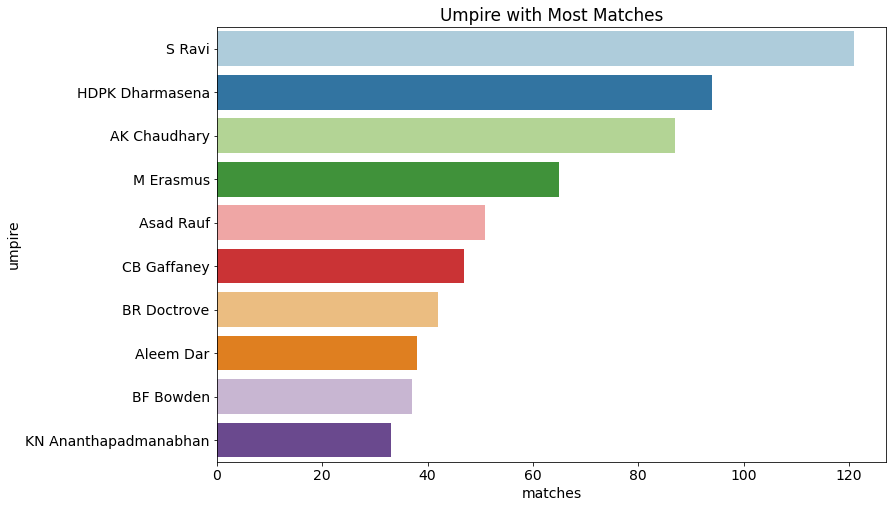

In [54]:
plt.title("Umpire with Most Matches")
sns.barplot(x="matches",y="umpire",data=umpire_df1,palette="Paired")

## Which city has hosted the maximum number of IPL matches

In [55]:
ipl_city=ipl_data['city'].value_counts()
ipl_city

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          65
Hyderabad          64
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Abu Dhabi          29
Dubai              26
Durban             15
Bengaluru          15
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Sharjah            12
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cape Town           7
Port Elizabeth      7
Ranchi              7
Cuttack             7
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [56]:
city_df=pd.DataFrame(columns=['City','Matches'])

for items in ipl_city.iteritems():
    temp_df6=pd.DataFrame({'City':[items[0]],'Matches':[items[1]]})
    city_df=city_df.append(temp_df6,ignore_index=True)

In [57]:
city_df

,City,Matches
0,Mumbai,101
1,Kolkata,77
2,Delhi,74
3,Bangalore,65
4,Hyderabad,64
5,Chennai,57
6,Chandigarh,56
7,Jaipur,47
8,Pune,38
9,Abu Dhabi,29


<AxesSubplot:title={'center':'IPL Maximum Hosted Cities'}, xlabel='Matches', ylabel='City'>

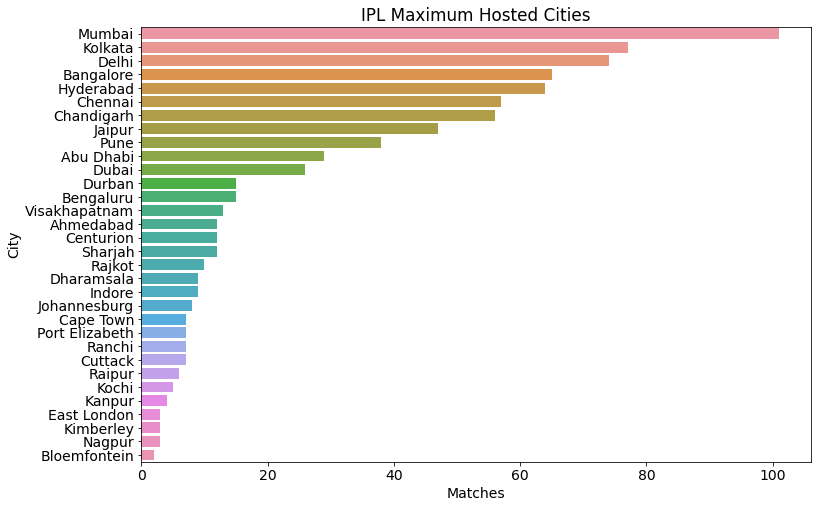

In [58]:
plt.title("IPL Maximum Hosted Cities")
sns.barplot(x='Matches',y="City",data=city_df)

## Does winning the toss has any advantage?

In [59]:
win_count=0

for index, value in ipl_data.iterrows():
    if(value['toss_winner']==value['winner']):
        win_count=win_count+1

print("The Number of Time Team Won after winning the toss:",win_count)
probability=(win_count/len(ipl_data))*100
print("The Probability of Winning the match after winning the toss is:{:.2f} percent".format(probability))

The Number of Time Team Won after winning the toss: 418
The Probability of Winning the match after winning the toss is:51.23 percent


## What are the major victories in IPL

In [60]:
ipl_major=ipl_data['result_margin'].value_counts()

In [61]:
ipl_major.sort_values(ascending=True)

140.0     1
66.0      1
105.0     1
75.0      1
69.0      1
         ..
4.0      53
8.0      67
5.0      85
7.0      94
6.0      95
Name: result_margin, Length: 91, dtype: int64

In [62]:
score=140
for index,row in ipl_data.iterrows():
    if (row['result_margin']==score):
        print(row)

id                                      335982
city                                 Bangalore
date                                2008-04-18
player_of_match                    BB McCullum
venue                    M Chinnaswamy Stadium
neutral_venue                                0
team1              Royal Challengers Bangalore
team2                    Kolkata Knight Riders
toss_winner        Royal Challengers Bangalore
toss_decision                            field
winner                   Kolkata Knight Riders
result                                    runs
result_margin                              140
eliminator                                   N
umpire1                              Asad Rauf
umpire2                            RE Koertzen
Name: 0, dtype: object


In [63]:
row

id                                             1237181
city                                             Dubai
date                                        2020-11-10
player_of_match                               TA Boult
venue              Dubai International Cricket Stadium
neutral_venue                                        0
team1                                   Delhi Capitals
team2                                   Mumbai Indians
toss_winner                             Delhi Capitals
toss_decision                                      bat
winner                                  Mumbai Indians
result                                         wickets
result_margin                                        5
eliminator                                           N
umpire1                                    CB Gaffaney
umpire2                                    Nitin Menon
Name: 815, dtype: object

### Is it better to defend or chase in IPL?

In [64]:
better_win=ipl_data['result'].value_counts()

In [65]:
better_win

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [66]:
len(ipl_data['result'])    

816

## Matches win While Chasing the total

In [71]:
wickets=435
matches_chasing=(wickets/len(ipl_data['result']))*100
print("The Number of Matches won while defending {:.2f} percent".format(matches_chasing))

The Number of Matches won while defending 53.31 percent


## Matches win while Defending the total

In [72]:
runs=364
matches_defend=(runs/len(ipl_data['result']))*100
print("The Number of Matches won while chasing {:.2f} percent".format(matches_defend))

The Number of Matches won while chasing 44.61 percent
